### Programation d'un neurone artificiel

#### Import des librarys

In [27]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from  utilities import load_data

#### Initialisation du dataset

X  (2, 100)
y  (1, 100)


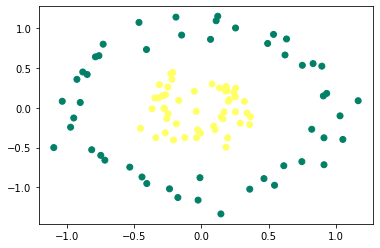

In [28]:
X, y = make_circles(n_samples = 100, noise=0.1, factor=0.3,random_state=0)
y = y.reshape((y.shape[0],1))

#on transpose les 2 matrices car les matrices des paramètres sont de dimensions m neurones, n facteurs
#le calule de Z se notera donc W.dot(X) (soit nW= m X.T) 
X= X.T 
y=y.T
print("X ", X.shape)
print("y ",y.shape)
plt.scatter(X[0,:],X[1,:], c = y, cmap="summer")
plt.show()

#### Fonction d'initialisation

In [29]:
#paramètre dimensions: liste qui contient le nombre d'entité par couche, entré et sortie comprise
def initialisation(dimensions):
    
    nombre_couches = len(dimensions)
    parametres={}
    for i in range(1,nombre_couches):
        parametres["W" + str(i)] = np.random.randn(dimensions[i],dimensions[i-1])
        parametres["b" + str(i)] = np.random.randn(dimensions[i],1)
    
    

    return parametres

#### Model

In [30]:
def forward_propagation(X,parametres):
    #calcules pour la couche 1
    #note attention à l'ordre avec le produit matriciel (.dot()) car cela depend des dimmensions des matrices
    #ici nW1 = mX
    activations = {}
    activations["A0"]=X
    #resultat en dimmensions m= nombre de neurone, n = nombre de paramètre
    #calcules pour les autres couches

    nombre_couches = len(parametres) //2
    #on fait une division entiere par 2 car il y a deux matrices par couche (W et b)
    for i in range(1,nombre_couches+1):
        Z= parametres["W"+str(i)].dot(activations["A"+str(i-1)]) + parametres["b"+str(i)]
        activations["A"+str(i)] = 1/(1+ np.exp(-Z))

    
    return activations

#### Fonction coût/Log Loss

In [31]:
#on utilise plutot le log_loss de sklearn
#def log_loss(A,y):
 #   return (1/len(y))*np.sum(-y*np.log(A) - (1 - y)* np.log(1-A))

#### Gradients

In [32]:
#cette fonction permet le calcule des gradients à chaque nouvelle itération
def back_propagation(y,parametres,activations):
    m = y.shape[1]
    nombre_couches = len(parametres) //2
    #calcule des gradients pour la couche dernière couche
    dZ= activations["A"+str(nombre_couches)]-y
    gradients = {}
    for i in reversed(range(1,nombre_couches+1)):
        #calcule de dL/dWn_couche 
        gradients["dW"+str(i)] = (1/m)*np.dot(dZ,activations["A"+str(i -1)].T)

        #calcule de dL/dbn_couche
        #note: keepdims permet de conserver les dimmensions afin de ne pas se retrouver avec une dimmension de type (m,)
        gradients["db"+str(i)]=(1/m)*np.sum(dZ,axis=1,keepdims=True)
        if i>1:
            dZ = np.dot(parametres["W"+str(i)].T,dZ)*activations["A"+str(i-1)]*(1 - activations["A"+str(i-1)])

    
    return gradients

#### Update des poids

In [33]:
def update(gradients,parametres, learning_rate):
    
    nombre_couches = len(parametres)//2
    for i in range(1,nombre_couches+1):
        parametres["W"+str(i)] = parametres["W"+str(i)] - learning_rate*gradients["dW"+str(i)]
        parametres["b"+str(i)] = parametres["b"+str(i)] - learning_rate*gradients["db"+str(i)]
    return parametres

#### Fonction de prediction

In [47]:
def predict(X,parametres):
    activations = forward_propagation(X,parametres)
    return activations["A"+str(len(activations)-1)]>=0.5

#### Algorithme de descente de gradient

In [43]:
def neural_network(X_train,y_train,couches_cachees,learning_rate=0.1,n_iter = 100):

    #on  definit la taille du reseau
    dimensions = list(couches_cachees)
    dimensions.insert(0, X_train.shape[0] ) #nombre de facteur mais on prend l'indice 0 car la matrice va être transposée
    dimensions.append(y.shape[0])

    #initialisation des coefficients
    parametres = initialisation(dimensions)


    Loss_history = []
    accuracy_history_train = []

    Loss_history_test = []
    accuracy_history_test = []
    for i in range(n_iter):
        activations = forward_propagation(X_train,parametres)
        gradients = back_propagation(y_train,parametres,activations)
        parametres = update( gradients, parametres, learning_rate)
        if i % 10 ==0:
            nombre_couches = len(parametres)//2
            #Train
            Loss_history.append(log_loss(y_train,activations["A"+str(nombre_couches)],))
            y_pred = predict(X_train,parametres)
            accuracy_history_train.append(accuracy_score(y_train.flatten(),y_pred.flatten()))

            #Test
           # activations_test = forward_propagation(X_train,parametres)
           # Loss_history_test.append(log_loss(y_test,activations_test["A2"]))
           # y_pred = predict(X_test,W,b)
           # accuracy_history_test.append(accuracy_score(y_test.flatten(),y_pred.flatten()))
    y_pred = predict(X_train,parametres)
    print("score : ", accuracy_score(y_train.flatten(),y_pred.flatten()))

    #graphique
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    plt.plot(Loss_history,label="Train Loss")
    #plt.plot(Loss_history_test,label="Test Loss")
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot(accuracy_history_train,label="Train Accuracy")
    #plt.plot(accuracy_history_test,label="Test Accuracy")
    plt.legend()
    plt.show() # affiche la figure a l'ecran
    return parametres

#### Test

score :  1.0


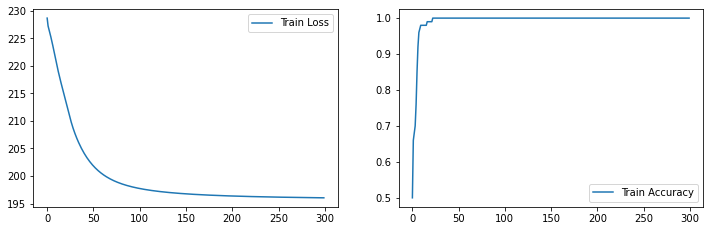

In [48]:
parametres = neural_network(X,y,(32,32,32),0.1,3000)

#### Mise en production

In [ ]:
new_data = np.array([2,1])
#on trace la frontiere de décision
x0 = np.linspace(-1,4,100)
x1 = (-W[0]*x0-b)/W[1]
plt.plot(x0,x1,c="orange",lw=3)
#on regarde où est cette donnée sur le graphique
plt.scatter(X[:,0],X[:,1],c = y, cmap="summer")
plt.scatter(new_data[0],new_data[1],c = "red")
predict(new_data,W,b)

NameError: name 'W' is not defined